DOES THE PUBLIC SENTIMENT HAVE AN EFFECT ON CRYPTOCURRENCY PRICE CHANGE?

Team Sixth Sense 
CS418 Spring 2022

Mounika Batchu - vbatch2@uic.edu - laxmimounika
Nicholas Chiu - nchiu5@uic.edu - nickdchiu
Sharan Gottuparthi - sgottu4@uic.edu - Sharang98
Vinayak Kabra - vkabra2@uic.edu - VINAYAKKABRA
Aditya Prakash Nair - anair45@uic.edu - AdityaNair45

https://github.com/uic-cs418/cs418-spring22-sixth-sense/blob/main/CS418_Sixth_Sense.ipynb

INTRODUCTION

Cryptocurrency has been a fast-growing technology that has become more widely accepted. In recent years, prices for cryptocurrency have skyrocketed and much is still not known about the causes behind these price fluctuations. Due to cryptocurrency not being controlled by any authority or being backed by any real items, its main price influence is due to the public. Thus, our project wants to explore the relation between public sentiment of cryptocurrency and whether or not it affects the price of coins.

In [1]:
import numpy as np
import pandas as pd

from functions import *

In [2]:
# Source: https://data.world/chasewillden/cryptocurrency-price-by-date-2013-february-2018
crypto_prices_df = pd.read_csv('chasewillden-cryptocurrency-price-by-date-2013-february-2018/chasewillden-cryptocurrency-price-by-date-2013-february-2018/data/cryptocurrency_prices_by_date.csv')

# Extract prices for the timeframe 01/01/2015 - 12/31/2018
# 2015-01-01 00:00:00  => 1420070400000
# 2018-12-31 23:59:59 => 1546261199000
crypto_prices_df = crypto_prices_df[(crypto_prices_df['date'] >= 1420070400000) & (crypto_prices_df['date'] <= 1546261199000)]

# Convert Unix time to Date time
crypto_prices_df['date'] = pd.to_datetime(crypto_prices_df['date'], unit='ms')
crypto_prices_df = addYearMonthAndDayColumns(crypto_prices_df)
crypto_prices_df[(crypto_prices_df['currency'] == 'bitcoin')].head()

,currency,date,price,Year,Month,Day
64769,bitcoin,2015-01-01 02:40:00,317.848,2015,1,1
64770,bitcoin,2015-01-02 00:53:20,313.639,2015,1,2
64771,bitcoin,2015-01-03 01:53:20,314.870,2015,1,3
64772,bitcoin,2015-01-04 00:06:40,281.246,2015,1,4
64773,bitcoin,2015-01-05 01:06:40,266.723,2015,1,5


In [3]:
#Source: https://edloginova.github.io/cryptodata/
news, reddit, bitcoinTalk = data_return()
news.head()

,text,post_id,date,Year,Month
9698,Venture capitalist Lou Kerner says bitcoin is ...,9783,2018-12-31 23:37:58,2018,12
9699,"Charlie Lee, the creator of Litecoin and the m...",9784,2018-12-31 23:30:27,2018,12
9700,As crypto’s value has dropped across the board...,9785,2018-12-31 23:24:38,2018,12
9701,Hacks and heists have been a threat for as lon...,9786,2018-12-31 23:05:03,2018,12
9702,It’s been over a year ...,9787,2018-12-31 22:46:45,2018,12


Data Cleaning:

We have two datasets used in this project. The first dataset is a CSV with 2 million rows, containing the price of thousands of cryptocurrencies, per day. Our other dataset is a collection of comments about cryptocurrency through different avenues (Reddit, BitcoinTalk, News). To clean our data, we read the csv and json files for price and sentiment into Pandas dataframes. We convert from unix time to a datetime object, and grab only needed columns. In addition, we add some features to the dataframe to make our EDA and ML easier.

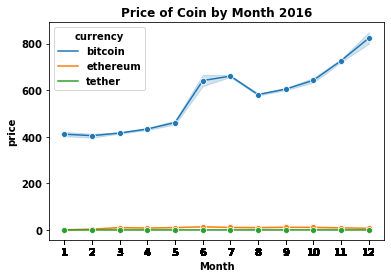

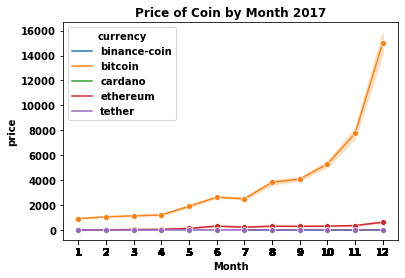

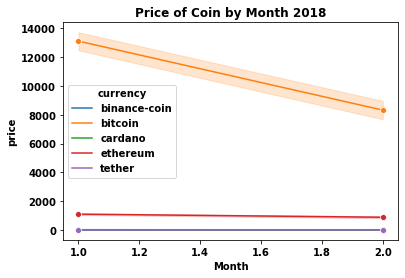

In [4]:
price_of_coin_2017_scatter(crypto_prices_df)

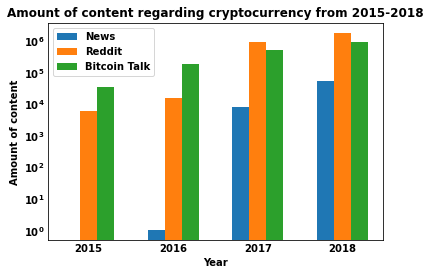

In [5]:
bar_chart(reddit,news,bitcoinTalk)

EDA:

We believe sentiment analysis on news to be a bit more credible than Reddit and Bitcoin Talk because on those online websites, anyone can post a comment. From our visualization, we see that we don't have any news data for 2015 and 2016. Thus, our data is making us look more closely at 2017 and 2018 which are interesting years for cryptocurrency (meteoric spike for Bitcoin, etc.).

In addition, from the monthly prices of coins in 2017, we can see that very few coins hold most of the market share in crypto. Since there are thousands of coins in our dataset, we decided to pick the top 3 coins to visualize and model, as these coins are most of the market. 

Our hypothesis was that positive public sentiment will cause increase in cryptocurrency prices. This is important because with cryptocurrency becoming more mainstream, knowing the mechanisms behind price fluctuations will be paramount for investing, predicting the future, and more.

In [6]:
news = sentiment_analysis(news)

ML:

We used sentiment analysis from Vader on the news dataset, and obtained a "comp_score" which is 1 for positive, 
-1 for negative. Through averaging the sentiment over each month, we can obtain an overall positive or negative sentiment for that month. We can then compare the prices of coins per year with their public sentiment.

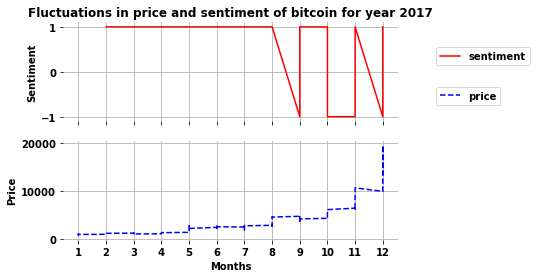

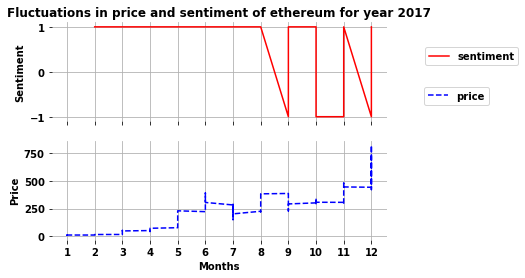

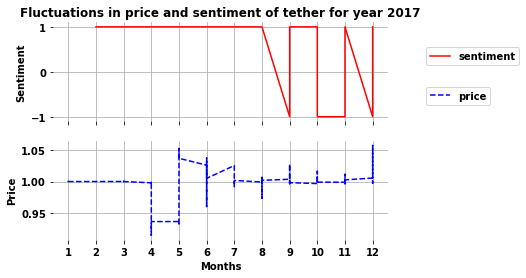

In [7]:
sentiment_vs_price(news, crypto_prices_df)

From our plots of average monthly sentiment against cryptocurrency price, we can draw some conclusions. While our initial hypothesis was that increase in sentiment would lead to an increase in crypto price, we can see that it doesn't hold. 

Looking at Bitcoin, we can actually see the inverse. From month 8-9, as well as 10-11, and 11-12, sentiment is overall negative but price is increasing. From month 9-10, when sentiment is changing to positive, price decreases.

The relationship for sentiment vs. price in Ethereum also holds an inverse relationship. However, for Tether, we were unable to draw a conclusion.

In [8]:
crypto_prices_df = price_extraction(crypto_prices_df)

In [9]:
news = comp_score(news)

In [10]:
#Data for machine learning models
price_sentiment = pd.merge(crypto_prices_df,news,on='Date_extracted')
price_sentiment.head()

,Date_extracted,price_raise/drop,comp_score
0,2016-06-04,1,1
1,2017-02-13,-1,1
2,2017-02-20,1,1
3,2017-06-15,1,1
4,2017-06-27,-1,1


ML:

From the public sentiment, we can then add a label of whether or not the cryptocurrency price increased (+1) or decreased (-1) the next day. This will be our truth values for our machine learning model as our goal is to predict whether or not the price will increased based on public sentiment. We take a further at Bitcoin, which is by far the most valuable and most well-known coin. The ML model can be extended to the other coins fairly easily. 

Our baseline model was just a classifier based on the mode of the label data (whether price increased or not). Our advanced machine learning model was a linear SVM. We tested multiple types of kernels and found that the linear kernel gave the best performance and thus chose that one to use. The dataset was split into training and test data at a 75/25 split. 

From our machine learning model, we can input the prices as well as raw news data, and it will calculate the sentiment and predict whether or not the price will increase or decrease. 

In [11]:
machine_learning(crypto_prices_df, news)

Baseline ML Model Accuracy: 
0.4796747967479675
Training accuracy:  0.5203252032520326
Test accuracy:  0.4634146341463415
Prediction on test data
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [12]:
KNN(crypto_prices_df, news)

KNN Test Accuracy:  0.4146341463414634


In [13]:
GNB(crypto_prices_df, news)

Gaussian Naive Bayes Test Accuracy: 0.6097560975609756


CONCLUSION:
    
While initially it was promising that some coins showed inverse relationships between sentiment and price, our final conclusion is that sentiment does not affect price heavily. While it may have some small effect, there is no conclusive way to determine, as there may be many other factors also affecting the cryptocurrency price. 

During our presentation we mentioned that future work could involve testing with other machine learning models. We've tested K-Nearest Neighbors as well as Gaussian Naive Bayes for prediction of price increase/decrease depending on sentiment.

In addition, we talked about including more sentiment data for us to compare to. We were in the process of adding Reddit and BitcoinTalk sentiment, but the amount of data is very large and the sentiment analysis takes very long. We have not included it in this report but it is definitely an avenue for future improvement. 